## PROBLEM 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn import metrics
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
warnings.filterwarnings("ignore")

In [2]:
firm_df = pd.read_csv("Firm Level.csv")

# 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null 
values, data types, shape, EDA). Perform Univariate and Bivariate Analysis. (8 marks) 

# EDA

In [3]:
firm_df.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [4]:
firm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    759 non-null    int64  
 1   sales         759 non-null    float64
 2   capital       759 non-null    float64
 3   patents       759 non-null    int64  
 4   randd         759 non-null    float64
 5   employment    759 non-null    float64
 6   sp500         759 non-null    object 
 7   tobinq        738 non-null    float64
 8   value         759 non-null    float64
 9   institutions  759 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 59.4+ KB


In [5]:
print("no. of rows: ",firm_df.shape[0], "\n""no. of columns: ",firm_df.shape[1])

no. of rows:  759 
no. of columns:  10


In [6]:
firm_df.dtypes

Unnamed: 0        int64
sales           float64
capital         float64
patents           int64
randd           float64
employment      float64
sp500            object
tobinq          float64
value           float64
institutions    float64
dtype: object

In [7]:
firm_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,759.0,379.000000,219.248717,0.000000,189.500000,379.000000,568.500000,758.000000
sales,759.0,2689.705158,8722.060124,0.138000,122.920000,448.577082,1822.547366,135696.788200
capital,759.0,1977.747498,6466.704896,0.057000,52.650501,202.179023,1075.790020,93625.200560
patents,759.0,25.831357,97.259577,0.000000,1.000000,3.000000,11.500000,1220.000000
randd,759.0,439.938074,2007.397588,0.000000,4.628262,36.864136,143.253403,30425.255860
employment,759.0,14.164519,43.321443,0.006000,0.927500,2.924000,10.050001,710.799925
tobinq,738.0,2.794910,3.366591,0.119001,1.018783,1.680303,3.139309,20.000000
value,759.0,2732.734750,7071.072362,1.971053,103.593946,410.793529,2054.160386,95191.591160
institutions,759.0,43.020540,21.685586,0.000000,25.395000,44.110000,60.510000,90.150000


In [8]:
firm_df.drop("Unnamed: 0",axis=1,inplace=True)

In [9]:
firm_df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46


In [10]:
# Are there any duplicates ?
dups = firm_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 0


### Treating Anomalies

In [11]:
firm_df.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [12]:
df_num = firm_df.select_dtypes(['float64','int64'])
df_cat = firm_df.select_dtypes(['object'])

In [13]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   tobinq        738 non-null    float64
 6   value         759 non-null    float64
 7   institutions  759 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 47.6 KB


In [14]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sp500   759 non-null    object
dtypes: object(1)
memory usage: 6.1+ KB


In [15]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='median')

In [16]:
imr = imputer.fit(df_num)
df_num = pd.DataFrame(imr.transform(df_num), columns=df_num.columns)

In [17]:
df_num.isnull().sum()

sales           0
capital         0
patents         0
randd           0
employment      0
tobinq          0
value           0
institutions    0
dtype: int64

In [18]:
df_num.describe()

,sales,capital,patents,randd,employment,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,2689.705158,1977.747498,25.831357,439.938074,14.164519,2.764071,2732.734750,43.020540
std,8722.060124,6466.704896,97.259577,2007.397588,43.321443,3.324665,7071.072362,21.685586
min,0.138000,0.057000,0.000000,0.000000,0.006000,0.119001,1.971053,0.000000
25%,122.920000,52.650501,1.000000,4.628262,0.927500,1.036000,103.593946,25.395000
50%,448.577082,202.179023,3.000000,36.864136,2.924000,1.680303,410.793529,44.110000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,3.082979,2054.160386,60.510000
max,135696.788200,93625.200560,1220.000000,30425.255860,710.799925,20.000000,95191.591160,90.150000


In [19]:
firm_new = pd.concat([df_num, df_cat], axis=1, join='inner')

In [20]:
firm_new.median()

sales           448.577082
capital         202.179023
patents           3.000000
randd            36.864136
employment        2.924000
tobinq            1.680303
value           410.793529
institutions     44.110000
dtype: float64

In [21]:
firm_new.shape

(759, 9)

In [22]:
firm_df = firm_new.copy()

In [23]:
firm_df["sp500"].value_counts(normalize = True)

no     0.714097
yes    0.285903
Name: sp500, dtype: float64

In [24]:
firm_df["randd"].value_counts(normalize = True)

0.000000     0.121212
88.254639    0.001318
10.259757    0.001318
27.972246    0.001318
0.184639     0.001318
               ...   
23.335045    0.001318
30.497925    0.001318
14.311391    0.001318
12.162350    0.001318
18.574360    0.001318
Name: randd, Length: 668, dtype: float64

In [25]:
firm_df.randd.replace(to_replace=-0, value=np.NaN, inplace= True)

In [26]:
firm_df[firm_df.randd.isnull()]

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500
1,407.753973,122.101012,2.0,NaN,1.860000,0.844187,243.117082,59.02,no
7,87.168004,30.671003,2.0,NaN,0.441000,0.319114,13.251614,25.37,no
26,217.987985,74.973010,0.0,NaN,1.500000,1.343798,144.143037,12.02,no
29,222.642991,134.621002,1.0,NaN,1.900000,1.452631,165.933886,57.59,no
31,5851.586151,13787.241420,1.0,NaN,10.173000,0.812917,6677.624577,65.81,yes
...,...,...,...,...,...,...,...,...,...
719,83.311010,47.431002,0.0,NaN,0.321000,0.503385,21.027352,22.45,no
725,61.836989,37.818997,1.0,NaN,0.577000,3.565593,96.061683,54.98,no
743,2438.200441,5033.099687,0.0,NaN,7.189000,0.862830,3875.482393,78.15,yes
746,333.142996,90.608016,1.0,NaN,5.088000,2.025869,220.911634,40.94,no


In [27]:
firm_df.randd = firm_df.randd.fillna(firm_df.randd.median())
firm_df[firm_df.randd.isnull()]

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500


In [28]:
firm_df.head(10)

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500
0,826.995050,161.603986,10.0,382.078247,2.306000,11.049511,1625.453755,80.27,no
1,407.753973,122.101012,2.0,52.704880,1.860000,0.844187,243.117082,59.02,no
2,8407.845588,6221.144614,138.0,3296.700439,49.659005,5.205257,25865.233800,47.70,yes
3,451.000010,266.899987,1.0,83.540161,3.071000,0.305221,63.024630,26.88,no
4,174.927981,140.124004,2.0,14.233637,1.947000,1.063300,67.406408,49.46,no
5,75.812001,31.865001,1.0,34.126228,0.700000,1.472817,43.408257,25.42,no
6,52.338997,19.668000,0.0,1.620797,0.571000,0.458281,15.084700,36.70,no
7,87.168004,30.671003,2.0,52.704880,0.441000,0.319114,13.251614,25.37,no
8,295.288967,120.006988,5.0,169.162231,1.494000,3.251124,364.579307,33.04,no
9,156.946033,17.268999,2.0,46.086353,0.637000,6.781052,198.242529,36.28,no


In [29]:
cat=[]
num=[]
for i in firm_df.columns:
    if firm_df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['sp500']
['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']


# Data Visualization

### Univariate Analysis

In [30]:
print(num)

['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']


In [31]:
dfcolumns=['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq',
       'value', 'institutions']

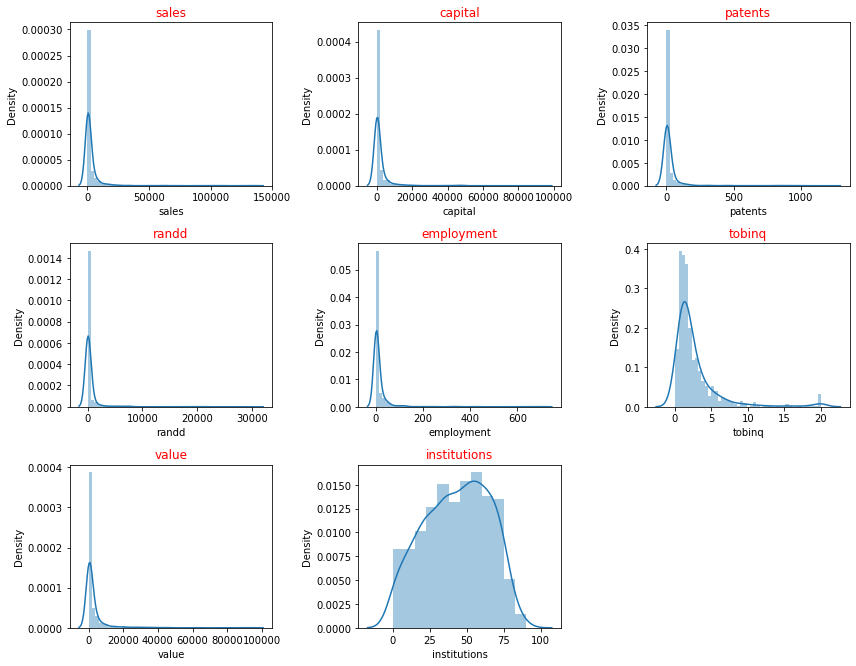

In [32]:
fig=plt.figure(figsize=(12,12))
for i in range(0,len(dfcolumns)):
   ax=fig.add_subplot(4,3,i+1)
   sns.distplot(firm_df[dfcolumns[i]])
   ax.set_title(dfcolumns[i],color='Red')
plt.tight_layout()

### Bivariate Analysis

In [33]:
## Numeric vs Numeric

In [34]:
print(num)

['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']


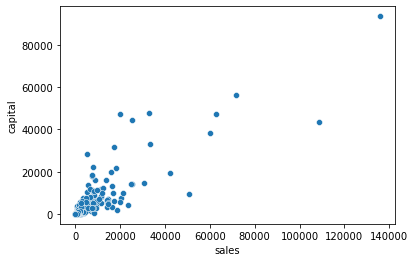

In [35]:
sns.scatterplot(x='sales', y='capital', data=firm_df)
plt.ticklabel_format(style='plain', axis='x')

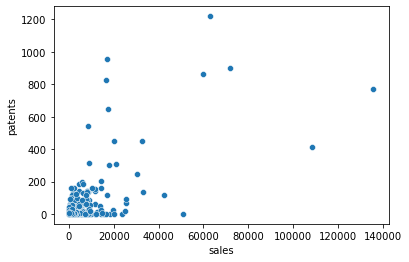

In [36]:
sns.scatterplot(x='sales', y='patents', data=firm_df)
plt.ticklabel_format(style='plain', axis='x')

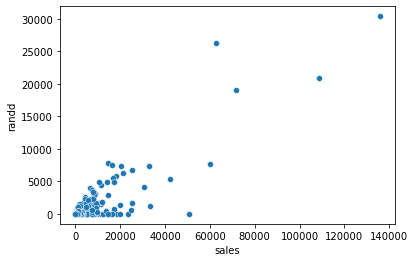

In [37]:
sns.scatterplot(x='sales', y='randd', data=firm_df)
plt.ticklabel_format(style='plain', axis='x')

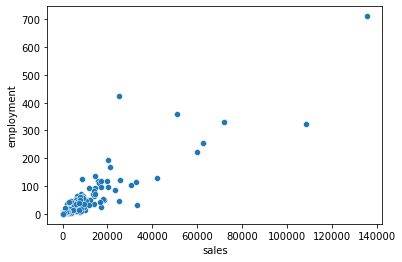

In [38]:
sns.scatterplot(x='sales', y='employment', data=firm_df)
plt.ticklabel_format(style='plain', axis='x')

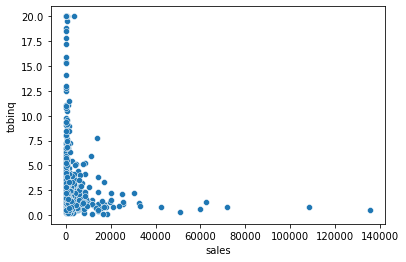

In [39]:
sns.scatterplot(x='sales', y='tobinq', data=firm_df)
plt.ticklabel_format(style='plain', axis='x')

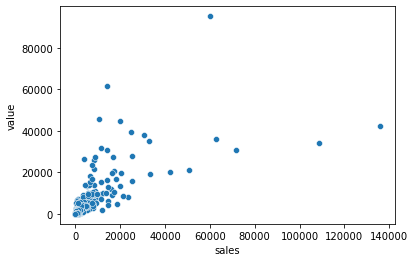

In [40]:
sns.scatterplot(x='sales', y='value', data=firm_df)
plt.ticklabel_format(style='plain', axis='x')

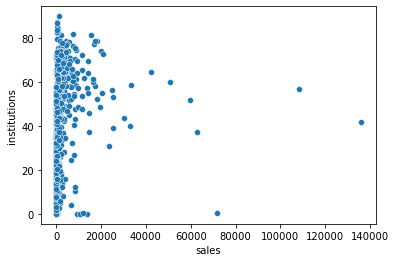

In [41]:
sns.scatterplot(x='sales', y='institutions', data=firm_df)
plt.ticklabel_format(style='plain', axis='x')

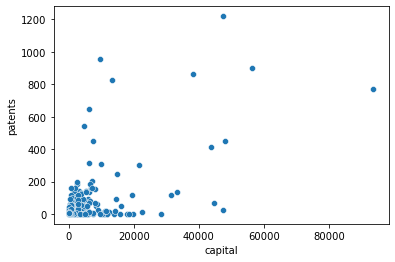

In [42]:
sns.scatterplot(x='capital', y='patents', data=firm_df)
plt.ticklabel_format(style='plain', axis='x')

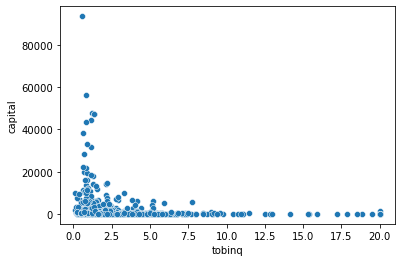

In [43]:
sns.scatterplot(x='tobinq', y='capital', data=firm_df)
plt.ticklabel_format(style='plain', axis='x')

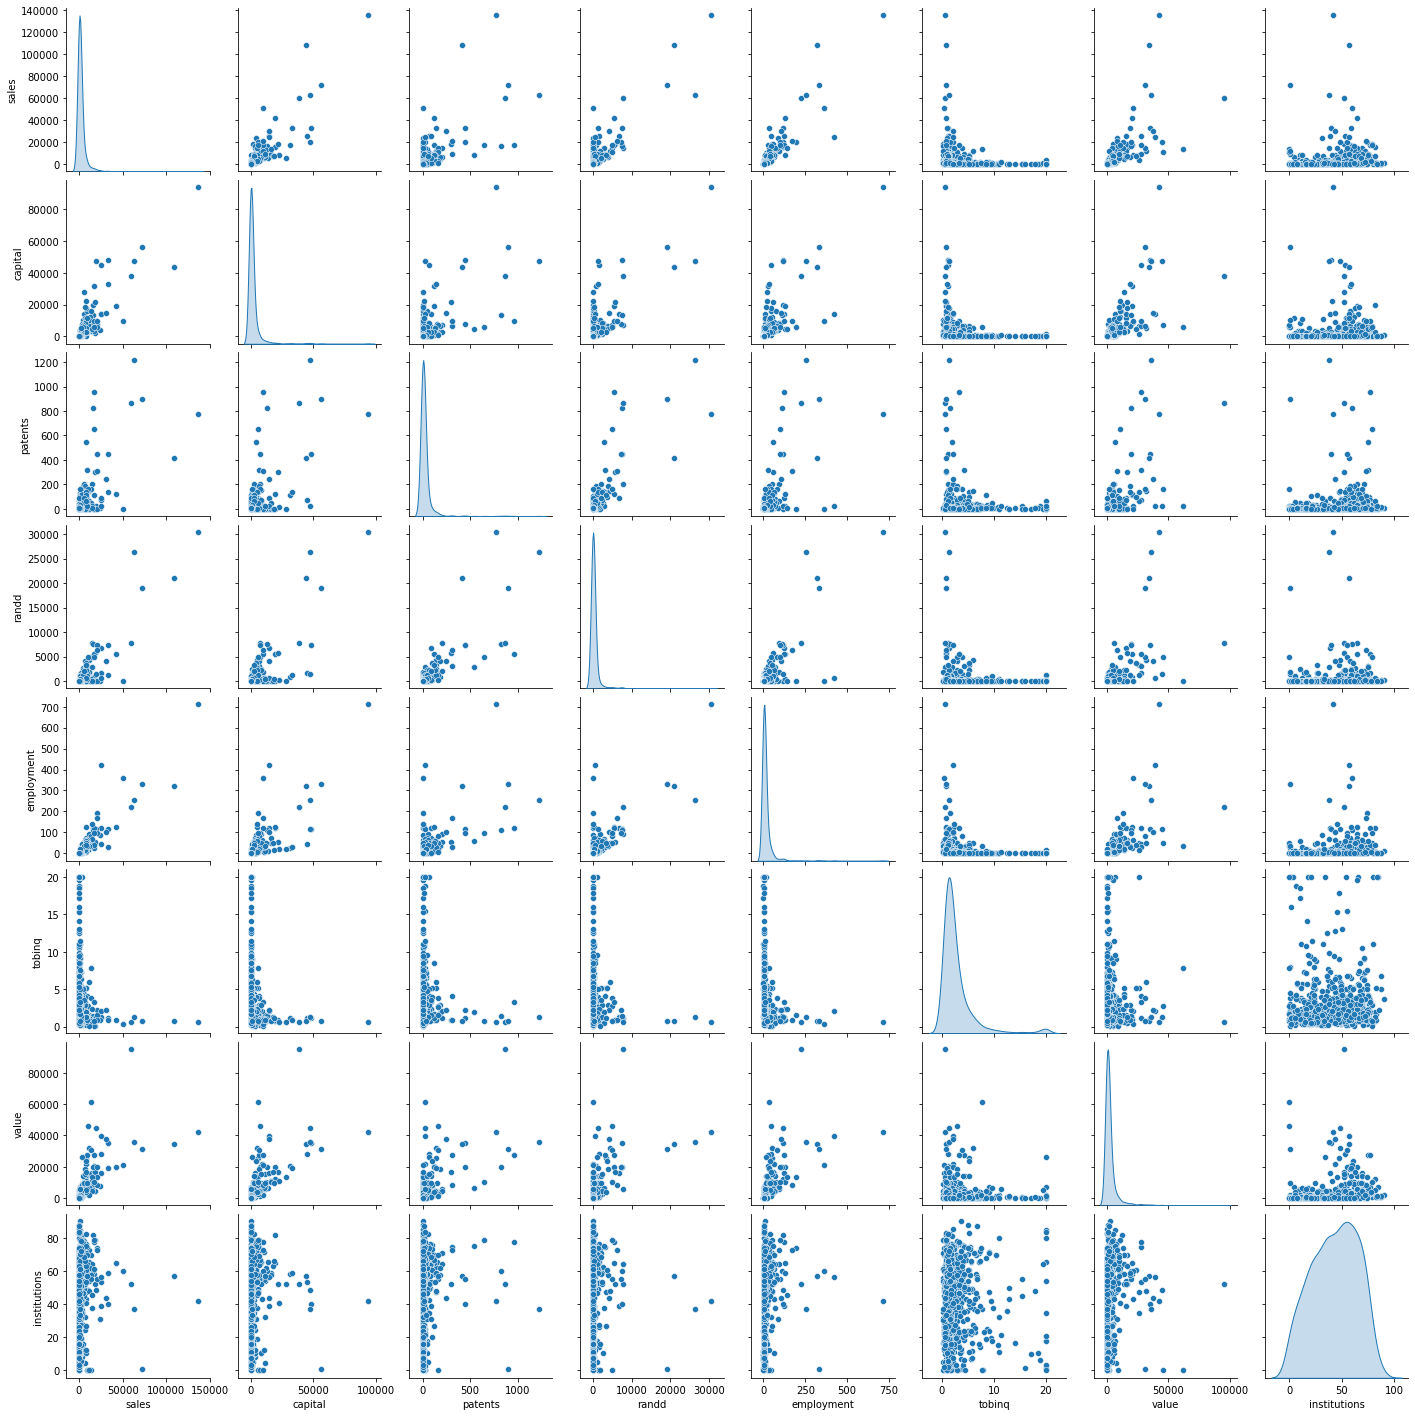

In [44]:
firm_attr = firm_df.iloc[:, 0:9]
sns.pairplot(
    firm_attr, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag

### Multivariate Analysis

In [45]:
print(cat) 
print(num)

['sp500']
['sales', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value', 'institutions']


<AxesSubplot:xlabel='sales', ylabel='capital'>

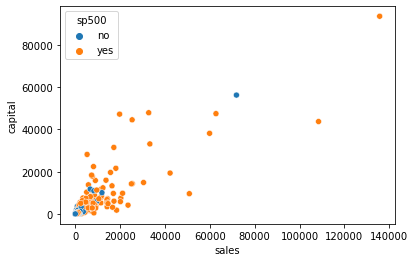

In [46]:
sns.scatterplot(x='sales', y='capital', hue='sp500', data=firm_df)

Insight:
We see more number of memberships with higher capital and sales ranging between 20000 through 60000. 

<AxesSubplot:xlabel='sales', ylabel='randd'>

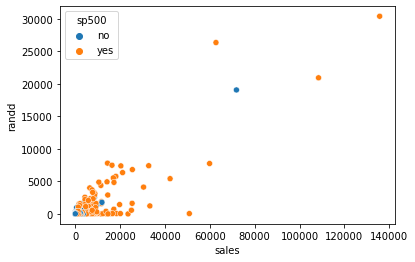

In [47]:
sns.scatterplot(x='sales', y='randd', hue='sp500', data=firm_df)

<AxesSubplot:xlabel='sales', ylabel='employment'>

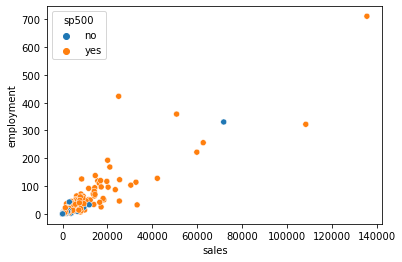

In [48]:
sns.scatterplot(x='sales', y='employment', hue='sp500', data=firm_df)

<AxesSubplot:xlabel='sales', ylabel='tobinq'>

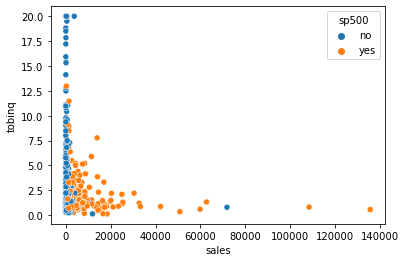

In [49]:
sns.scatterplot(x='sales', y='tobinq', hue='sp500', data=firm_df)

<AxesSubplot:xlabel='sales', ylabel='value'>

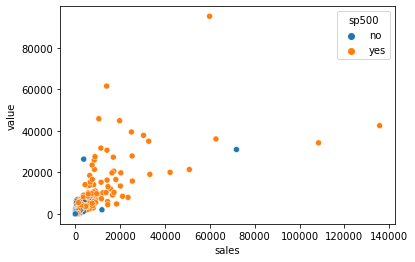

In [50]:
sns.scatterplot(x='sales', y='value', hue='sp500', data=firm_df)

<AxesSubplot:xlabel='sales', ylabel='institutions'>

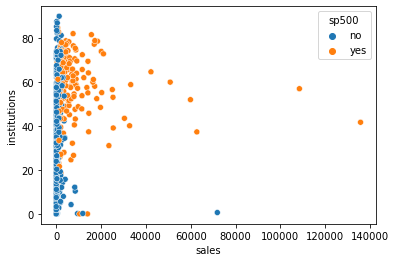

In [51]:
sns.scatterplot(x='sales', y='institutions', hue='sp500', data=firm_df)

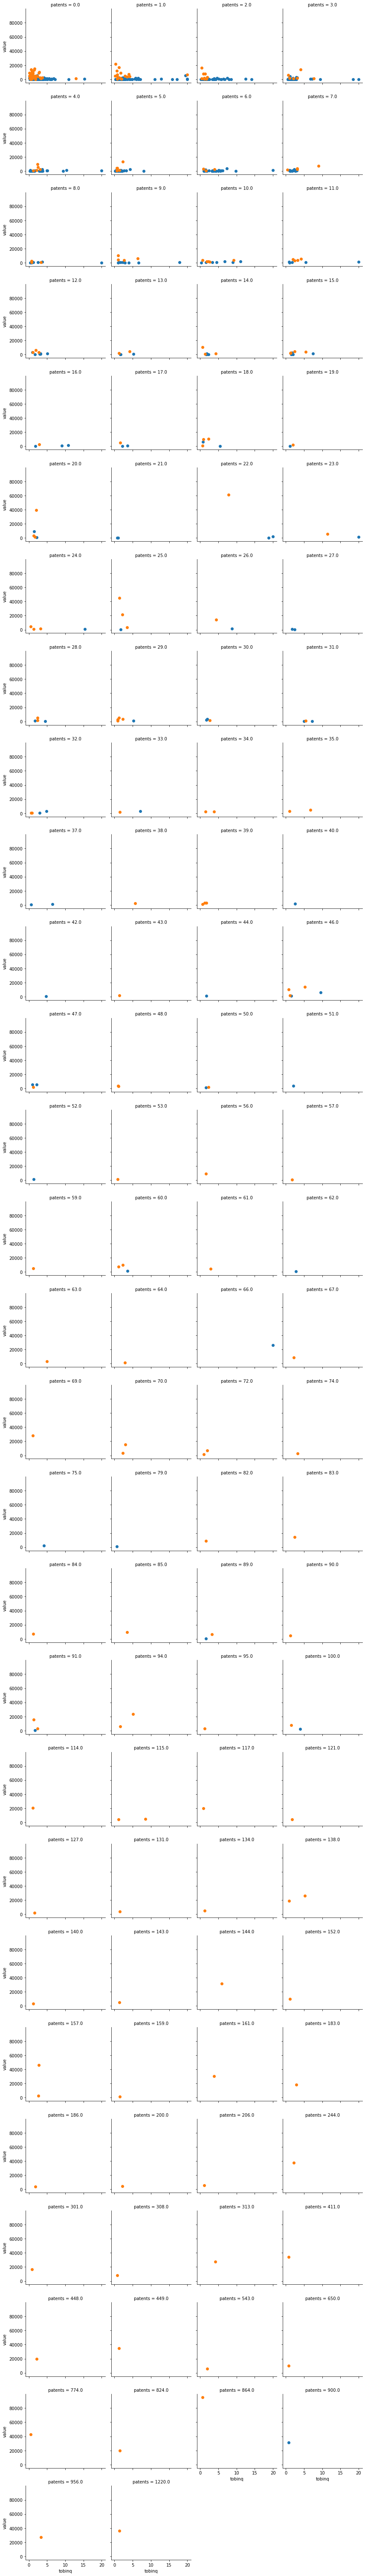

In [52]:
g = sns.FacetGrid(firm_df, col="patents", hue='sp500',col_wrap=4, height=3)
g = g.map(plt.scatter, "tobinq", 'value')

## Correlation Plot

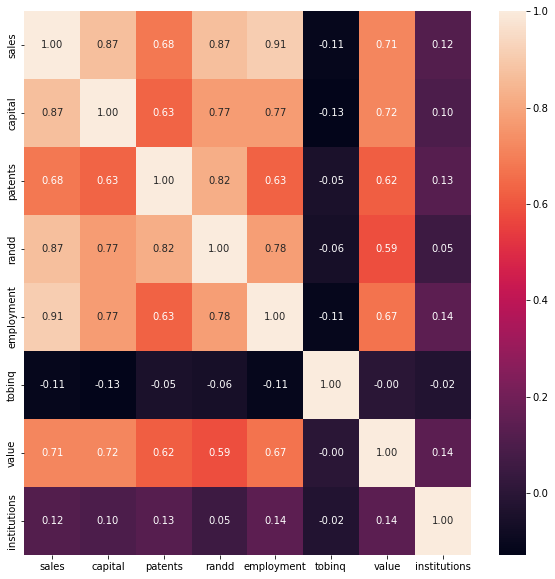

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(firm_df.corr(),annot=True,fmt=".2f");

In [54]:
corr = firm_df.corr()
round(corr,2)

,sales,capital,patents,randd,employment,tobinq,value,institutions
sales,1.00,0.87,0.68,0.87,0.91,-0.11,0.71,0.12
capital,0.87,1.00,0.63,0.77,0.77,-0.13,0.72,0.10
patents,0.68,0.63,1.00,0.82,0.63,-0.05,0.62,0.13
randd,0.87,0.77,0.82,1.00,0.78,-0.06,0.59,0.05
employment,0.91,0.77,0.63,0.78,1.00,-0.11,0.67,0.14
tobinq,-0.11,-0.13,-0.05,-0.06,-0.11,1.00,-0.00,-0.02
value,0.71,0.72,0.62,0.59,0.67,-0.00,1.00,0.14
institutions,0.12,0.10,0.13,0.05,0.14,-0.02,0.14,1.00


## Outlier Checks

In [55]:
firm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    float64
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   tobinq        759 non-null    float64
 6   value         759 non-null    float64
 7   institutions  759 non-null    float64
 8   sp500         759 non-null    object 
dtypes: float64(8), object(1)
memory usage: 53.5+ KB


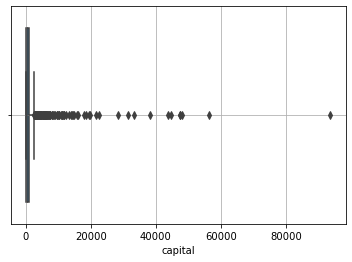

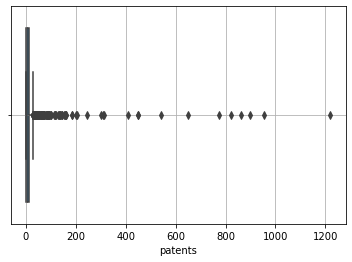

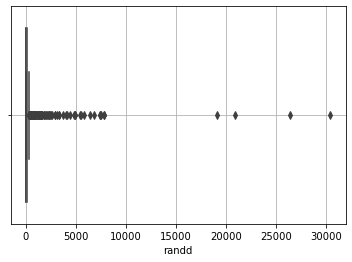

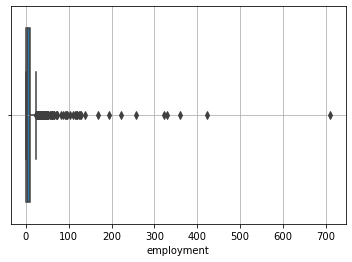

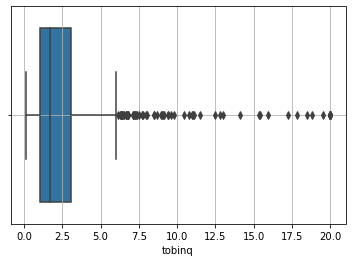

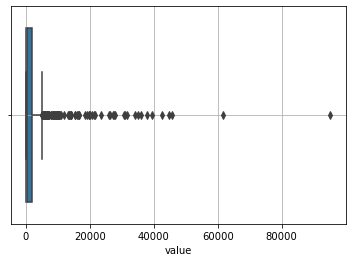

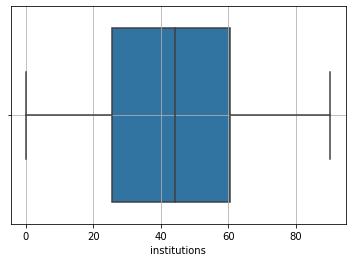

In [56]:
cols = ['capital','patents','randd','employment','tobinq','value','institutions']
for i in cols:
    sns.boxplot(firm_df[i],whis=1.5)
    plt.grid()
    plt.show();

# Create Dummy Variables

In [57]:
firm_df.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500
0,826.995050,161.603986,10.0,382.078247,2.306000,11.049511,1625.453755,80.27,no
1,407.753973,122.101012,2.0,52.704880,1.860000,0.844187,243.117082,59.02,no
2,8407.845588,6221.144614,138.0,3296.700439,49.659005,5.205257,25865.233800,47.70,yes
3,451.000010,266.899987,1.0,83.540161,3.071000,0.305221,63.024630,26.88,no
4,174.927981,140.124004,2.0,14.233637,1.947000,1.063300,67.406408,49.46,no


In [58]:
firm_df_dummy = pd.get_dummies(firm_df,drop_first=True)
firm_df_dummy.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,826.995050,161.603986,10.0,382.078247,2.306000,11.049511,1625.453755,80.27,0
1,407.753973,122.101012,2.0,52.704880,1.860000,0.844187,243.117082,59.02,0
2,8407.845588,6221.144614,138.0,3296.700439,49.659005,5.205257,25865.233800,47.70,1
3,451.000010,266.899987,1.0,83.540161,3.071000,0.305221,63.024630,26.88,0
4,174.927981,140.124004,2.0,14.233637,1.947000,1.063300,67.406408,49.46,0


In [59]:
firm_df_dummy['sp500_yes'] = firm_df_dummy['sp500_yes'].astype('float64')

In [60]:
firm_df_dummy.dtypes

sales           float64
capital         float64
patents         float64
randd           float64
employment      float64
tobinq          float64
value           float64
institutions    float64
sp500_yes       float64
dtype: object

In [61]:
firm_df_dummy.describe()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,2689.705158,1977.747498,25.831357,446.326545,14.164519,2.764071,2732.734750,43.020540,0.285903
std,8722.060124,6466.704896,97.259577,2006.069012,43.321443,3.324665,7071.072362,21.685586,0.452141
min,0.138000,0.057000,0.000000,0.013687,0.006000,0.119001,1.971053,0.000000,0.000000
25%,122.920000,52.650501,1.000000,14.634818,0.927500,1.036000,103.593946,25.395000,0.000000
50%,448.577082,202.179023,3.000000,52.704880,2.924000,1.680303,410.793529,44.110000,0.000000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,3.082979,2054.160386,60.510000,1.000000
max,135696.788200,93625.200560,1220.000000,30425.255860,710.799925,20.000000,95191.591160,90.150000,1.000000


# Normalizing and Scaling

In [62]:
# Method 1
## Using Zscore for scaling/standardisation
from scipy.stats import zscore
firm_scaled=firm_df_dummy.apply(zscore)

In [63]:
firm_scaled.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,-0.213704,-0.281030,-0.162882,-0.032048,-0.273914,2.493756,-0.156696,1.718839,-0.632747
1,-0.261802,-0.287143,-0.245190,-0.196345,-0.284216,-0.577847,-0.352317,0.738279,-0.632747
2,0.656027,0.656624,1.154052,1.421812,0.819869,0.734749,3.273585,0.215929,1.580410
3,-0.256841,-0.264737,-0.255479,-0.180964,-0.256243,-0.740066,-0.377803,-0.744789,-0.632747
4,-0.288514,-0.284354,-0.245190,-0.215535,-0.282206,-0.511899,-0.377183,0.297142,-0.632747


In [64]:
firm_scaled.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
sales,759.0,0.0,1.0,-0.31,-0.29,-0.26,-0.10,15.26
capital,759.0,0.0,1.0,-0.31,-0.30,-0.27,-0.14,14.18
patents,759.0,-0.0,1.0,-0.27,-0.26,-0.23,-0.15,12.29
randd,759.0,-0.0,1.0,-0.22,-0.22,-0.20,-0.15,14.95
employment,759.0,0.0,1.0,-0.33,-0.31,-0.26,-0.10,16.09
tobinq,759.0,-0.0,1.0,-0.80,-0.52,-0.33,0.10,5.19
value,759.0,0.0,1.0,-0.39,-0.37,-0.33,-0.10,13.08
institutions,759.0,0.0,1.0,-1.99,-0.81,0.05,0.81,2.17
sp500_yes,759.0,-0.0,1.0,-0.63,-0.63,-0.63,1.58,1.58


## Train-Test Split

In [65]:
firm_df = firm_scaled.copy()

In [66]:
firm_df.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,-0.213704,-0.281030,-0.162882,-0.032048,-0.273914,2.493756,-0.156696,1.718839,-0.632747
1,-0.261802,-0.287143,-0.245190,-0.196345,-0.284216,-0.577847,-0.352317,0.738279,-0.632747
2,0.656027,0.656624,1.154052,1.421812,0.819869,0.734749,3.273585,0.215929,1.580410
3,-0.256841,-0.264737,-0.255479,-0.180964,-0.256243,-0.740066,-0.377803,-0.744789,-0.632747
4,-0.288514,-0.284354,-0.245190,-0.215535,-0.282206,-0.511899,-0.377183,0.297142,-0.632747


In [67]:
# independent variables
X = firm_df.drop(["sales"], axis=1)
# dependent variable
y = firm_df[["sales"]]

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# Linear Regression Model

In [69]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [70]:
print(X_train.head())

      capital   patents     randd  employment    tobinq     value  \
626 -0.102446 -0.111439 -0.186084    0.053299 -0.333052 -0.070880   
333 -0.303676 -0.245190 -0.218019   -0.314105 -0.717031 -0.385324   
257 -0.222758 -0.059996 -0.179044   -0.174105 -0.191825 -0.242456   
173 -0.181128 -0.265767 -0.188266   -0.151469  0.116599 -0.072309   
242 -0.243753 -0.245190 -0.196345   -0.291376 -0.183503 -0.336054   

     institutions  sp500_yes  
626     -0.532988  -0.632747  
333     -0.984276  -0.632747  
257      1.228328  -0.632747  
173      1.230635   1.580410  
242      1.956480  -0.632747  


In [71]:
print(X_test.head())

      capital   patents     randd  employment    tobinq     value  \
480 -0.298194 -0.255479 -0.199104   -0.300685 -0.529094 -0.381837   
622 -0.293509 -0.234901 -0.197569   -0.248644 -0.452728 -0.363394   
638 -0.132883 -0.070285 -0.183416    0.111415 -0.259944 -0.087443   
389 -0.295400 -0.234901 -0.200274   -0.299368 -0.150969 -0.375077   
748 -0.258258 -0.245190 -0.183215   -0.251785 -0.307684 -0.311286   

     institutions  sp500_yes  
480     -0.373791  -0.632747  
622     -1.113941  -0.632747  
638      0.227003   1.580410  
389     -0.847690  -0.632747  
748     -1.244528  -0.632747  


In [72]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for capital is 0.3066153806149819
The coefficient for patents is -0.05634822734583456
The coefficient for randd is 0.23693096745913192
The coefficient for employment is 0.4166462406798384
The coefficient for tobinq is -0.011833228408590015
The coefficient for value is 0.10281084795950315
The coefficient for institutions is 0.0024929370880149514
The coefficient for sp500_yes is -0.005188892351173031


In [73]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.003610921958885493


In [74]:
regression_model.score(X_train, y_train)

0.9364130141309133

In [75]:
regression_model.score(X_test, y_test)

0.8929909233040394

In [76]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.24825932319576893

In [77]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.3385032975537098

## Linear Regression using statsmodels(OLS)

In [78]:
import statsmodels.api as sm

In [79]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [80]:
model = sm.OLS(y_train,X_train).fit()
model

In [81]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     960.9
Date:                Sat, 15 Jul 2023   Prob (F-statistic):          1.19e-306
Time:                        02:00:28   Log-Likelihood:                -13.624
No. Observations:                 531   AIC:                             45.25
Df Residuals:                     522   BIC:                             83.72
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0036      0.011     -0.332      0.740      -0.025       0.018
capital          0.3066      0.020     15.529      0.000       0.268       0.345
patents         -0.0563      0.027     -2.102      0.036      -0.109      -0.004
randd            0.2369      0.029      8.072      0.000       0.179       0.295
employment       0.4166      0.018     23.106      0.000       0.381       0.452
tobinq          -0.0118      0.012     -1.027      0.305      -0.034       0.011
value            0.1028      0.017      5.894      0.000       0.069       0.137
institutions     0.0025      0.012      0.202      0.840      -0.022       0.027
sp500_yes       -0.0052      0.014     -0.374      0.709      -0.032       0.022
==============================================================================
Omnibus:                      231.971   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31337.540
Skew:                           0.815   Prob(JB):                         0.00
Kurtosis:                      40.600   Cond. No.                         7.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# check for Multicollinearity

In [82]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const           1.003444
capital         3.460555
patents         5.442413
randd           7.330638
employment      3.176194
tobinq          1.041126
value           2.972649
institutions    1.294486
sp500_yes       1.646040
dtype: float64



The VIF values indicate that the feature randd is correlated with one or more independent features.

Multicollinearity affects only the specific independent variables that are correlated. Therefore, in this case, we can trust the p-values of capital, patents, employment, tobinq, value, institutions and sp500_yes variables.

To treat multicollinearity, we will have to drop one or more of the correlated features.

We will drop the variable that has the least impact on the adjusted R-squared of the model.

In [83]:
X_train1 = X_train.drop(["randd"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.928 
Adjusted R-squared: 0.928


In [84]:
print(olsres_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     969.9
Date:                Sat, 15 Jul 2023   Prob (F-statistic):          7.72e-295
Time:                        02:00:28   Log-Likelihood:                -44.852
No. Observations:                 531   AIC:                             105.7
Df Residuals:                     523   BIC:                             139.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0025      0.012     -0.213   

Since there is no effect on adj. R-squared after dropping the 'randd' column, we can remove it from the training set.

In [85]:
X_train = X_train.drop(["randd"], axis=1)

In [86]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const           1.003270
capital         2.947891
patents         2.140319
employment      2.470442
tobinq          1.033435
value           2.544547
institutions    1.267388
sp500_yes       1.644687
dtype: float64



VIF for all the features is <=2

## Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.

In [87]:
olsmod_2 = sm.OLS(y_train, X_train)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     969.9
Date:                Sat, 15 Jul 2023   Prob (F-statistic):          7.72e-295
Time:                        02:00:28   Log-Likelihood:                -44.852
No. Observations:                 531   AIC:                             105.7
Df Residuals:                     523   BIC:                             139.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0025      0.012     -0.213   

As observed in the above model (olsres_2), 'tobinq','institutions','sp500_yes' has a p-value greater than 0.05. So, we can drop these because they are not significant in predicting 'sales'.

In [88]:
X_train2 = X_train.drop(["tobinq","institutions","sp500_yes"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train2)
olsres_3 = olsmod_3.fit()
print(olsres_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1700.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):          3.67e-299
Time:                        02:00:29   Log-Likelihood:                -45.911
No. Observations:                 531   AIC:                             101.8
Df Residuals:                     526   BIC:                             123.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.012     -0.241      0.8

After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply (adj. R-squared has dropped from 0.936 to 0.928). This shows that these variables did not have much predictive power.
Since there is no effect on adj. R-squared after dropping these columns, we can remove them from the training set.

In [89]:
X_train = X_train.drop(["tobinq","institutions","sp500_yes"], axis=1)

In [90]:
olsmod_4 = sm.OLS(y_train, X_train)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     1700.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):          3.67e-299
Time:                        02:00:29   Log-Likelihood:                -45.911
No. Observations:                 531   AIC:                             101.8
Df Residuals:                     526   BIC:                             123.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.012     -0.241      0.8

In [91]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_4.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_4.resid.values  # residuals

df_pred.head()


,Actual Values,Fitted Values,Residuals
0,-0.085183,-0.030485,-0.054698
1,-0.301662,-0.311413,0.009751
2,-0.186312,-0.186757,0.000445
3,-0.171639,-0.175686,0.004047
4,-0.289752,-0.276092,-0.013661


## Predictions

In [92]:
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

Series before feature selection: 

const         1.001395
capital       2.898622
patents       2.131599
employment    2.436247
value         2.295020
dtype: float64



In [93]:
X_train.columns

Index(['const', 'capital', 'patents', 'employment', 'value'], dtype='object')

In [94]:
X_test.columns

Index(['const', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value',
       'institutions', 'sp500_yes'],
      dtype='object')

In [95]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ["randd", "tobinq", "institutions","sp500_yes"], axis=1
)

In [96]:
X_test2.columns

Index(['const', 'capital', 'patents', 'employment', 'value'], dtype='object')

In [97]:
# let's make predictions on the test set
y_pred = olsres_4.predict(X_test2)

In [98]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

0.2638227194387161

In [99]:
print("The Root Mean Square Error (RMSE) of the model for the training set is",np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"])))

The Root Mean Square Error (RMSE) of the model for the training set is 0.2638227194387161


In [100]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

0.4187748828461274

In [101]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test, y_pred)))

The Root Mean Square Error (RMSE) of the model is for testing set is 0.4187748828461274


In [102]:
# let's check the MAE on the train data
mae1 = mean_absolute_error(y_train, df_pred["Fitted Values"])
mae1

0.0922453878730787

In [103]:
# let's check the MAE on the test data
mae2 = mean_absolute_error(y_test, y_pred)
mae2

0.0869208852960289

In [104]:
for i,j in np.array(olsres_4.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * const + (0.37) * capital + (0.11) * patents + (0.48) * employment + (0.05) * value + 